# Cartpole Balancing Problem
  

## # Very Important References

#References 1: https://gymnasium.farama.org/

#References 2: https://stable-baselines3.readthedocs.io/en/master/guide/install.html

#Reference 3: https://spinningup.openai.com/en/latest/ 

#Reference 4: https://stable-baselines.readthedocs.io/en/master/common/schedules.html

Referennce 5: https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html

Reference 6: https://huggingface.co/learn/deep-rl-course/unit6/introduction

Reference 7: https://en.wikipedia.org/wiki/Reinforcement_learning

Reference 8: K. Kurach, A. Raichuk, P. Stanczyk, M. Zajac, O. Bachem, L. Espeholt, C. Riquelme, D. Vincent, M. Michalski, O. Bousquet, and S. Gelly, “Google research football: A novel reinforcement learning environment,” in AAAI, 2020.

Reference 9: Shengyi Huang, Anssi Kanervisto, Antonin Raffin, Weixun Wang, Santiago Ontañón, Rousslan Fernand Julien Dossa, A2C is a special case of PPO, arXiv:2205.09123v1 [cs.LG] 18 May 2022

Cartpole Balancing Problem A:  With PPO (No experience replay)

(1) Import dependencies (2) Test Environment (3) Train Environment (4) Save (5) Evaluate and Tes

### (1) Install dependencies:


In [1]:
!pip install stable-baselines3
!pip install --upgrade pygame
!pip install gymnasium[box2d]

#Install Tensorboard
!pip install tensorboard
!pip install jupyter-tensorboard

zsh:1: no matches found: gymnasium[box2d]


In [2]:
#To enable Tensorboard extension, if not already loaded
%load_ext tensorboard

In [3]:
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env.dummy_vec_env import DummyVecEnv
#from stable_baselines3 import PPO
from stable_baselines3 import PPO, A2C
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecFrameStack
from typing import Callable

import gymnasium as gym
from gym import make
import numpy as np
import time
import os  # to define paths and save module


import matplotlib.pyplot as plt

### (2) Test experiment: Visualize the untrained agent's behavior in the environment.


Episode:1 Score:17.0


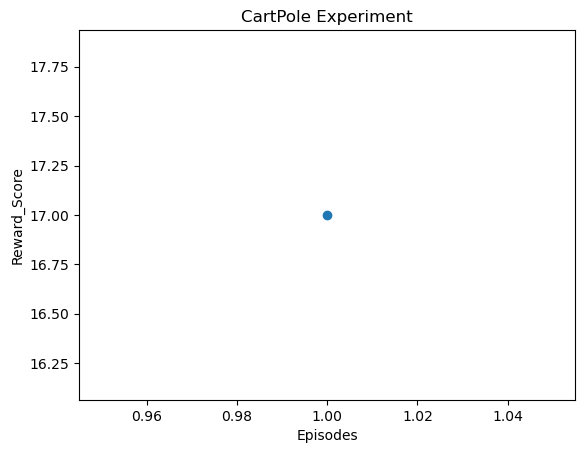

Episode:2 Score:18.0


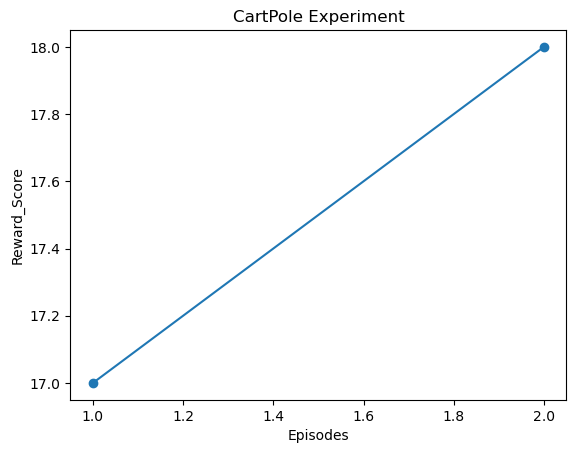

Episode:3 Score:22.0


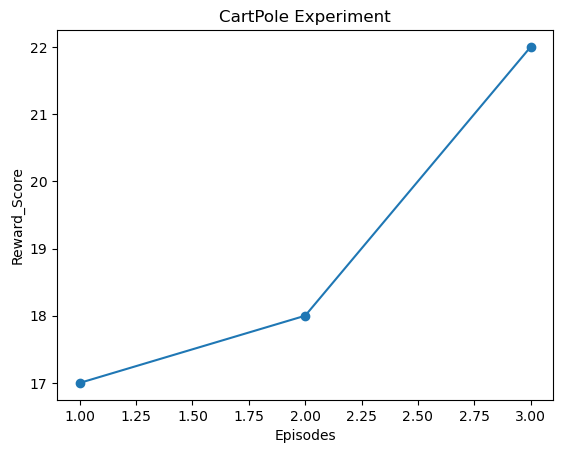

Episode:4 Score:20.0


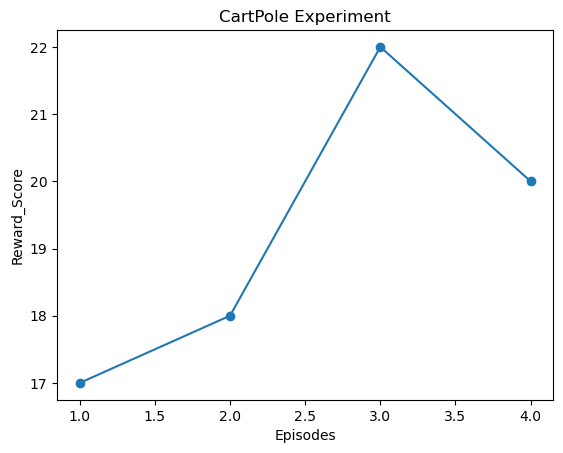

Episode:5 Score:54.0


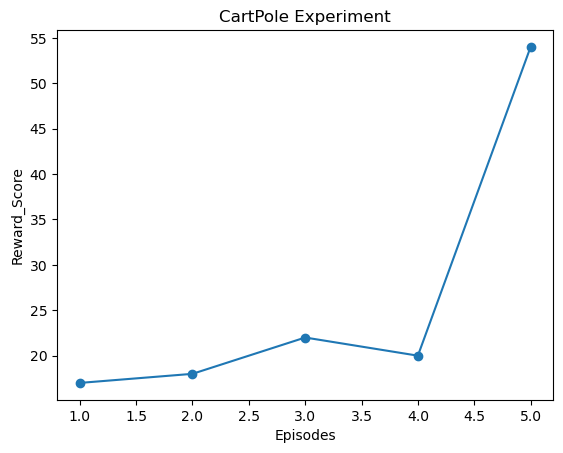

Episode:6 Score:14.0


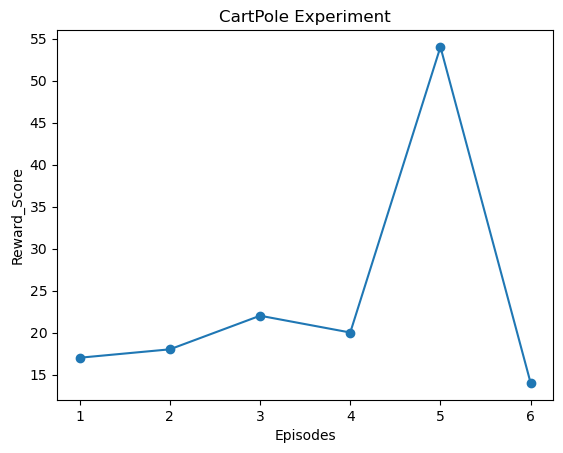

Episode:7 Score:42.0


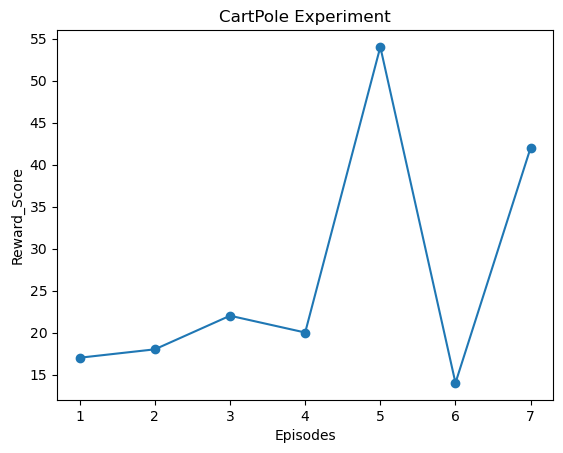

Episode:8 Score:17.0


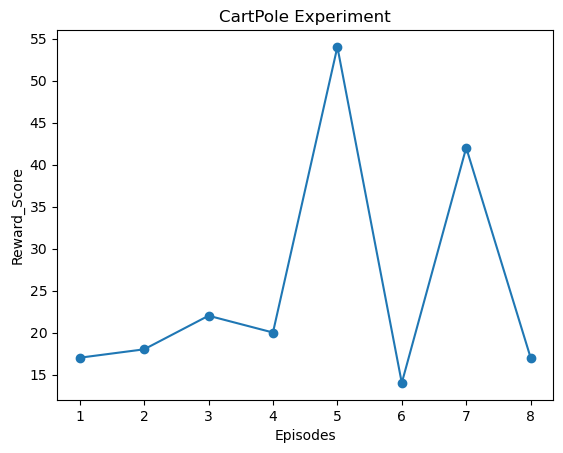

Episode:9 Score:14.0


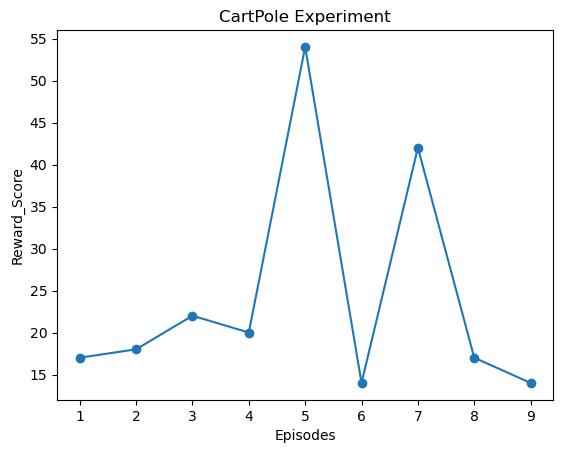

Episode:10 Score:16.0


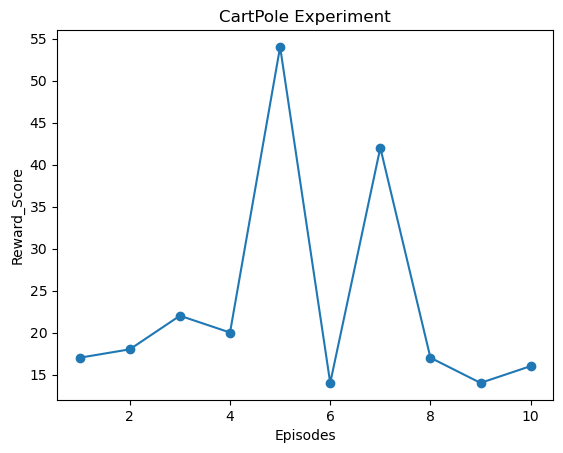

In [5]:
# This is just a random test experiment for the Cartpole problem
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode='human')
episodes = 10
scores = []  # List to reward  scores

for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render()  # Render the environment
        action = env.action_space.sample()  # This randomly generates an action that the agent takes
        n_state, reward, done, _ = env.step(action)[:4]

        score += reward

    scores.append(score)
    print('Episode:{} Score:{}'.format(episode, score))
    plt.plot(range(1, episode + 1), scores, marker='o')
    plt.title('CartPole Experiment')
    plt.xlabel('Episodes')
    plt.ylabel('Reward_Score')
    plt.pause(0.1)  # Pause to allow the plot to be displayed

env.close()
plt.show()  # Show the final plot


Learn More About The Characteristics of the  Environment

### Advantage Actor-critic (A2C) and Proximal Policy Optimization (PPO): Popular reinforcement learning algorithms

# 1.0 Introduction 

Reinforcement learning (RL) is a branch of artificial intelligence and one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning. Unlike the supervised learning, where  training data  is used to train the model for correct decsion making, the RL agent  learns from its  experiences in the real world, with the help of rewards and penalties for their behaviors, it does not need labelled input/output pairs for learning. It's application to a wide range of fields, including robotics, natural language processing, and game playing have been widely reported. 

The Markov Decision Process (MDP) provides a mathematical framework for formulating RL probelms. Let us illustrate the framework using a problem of optimal maintenance schedule for a crucial manufacturing equipment (such as steam turbine).


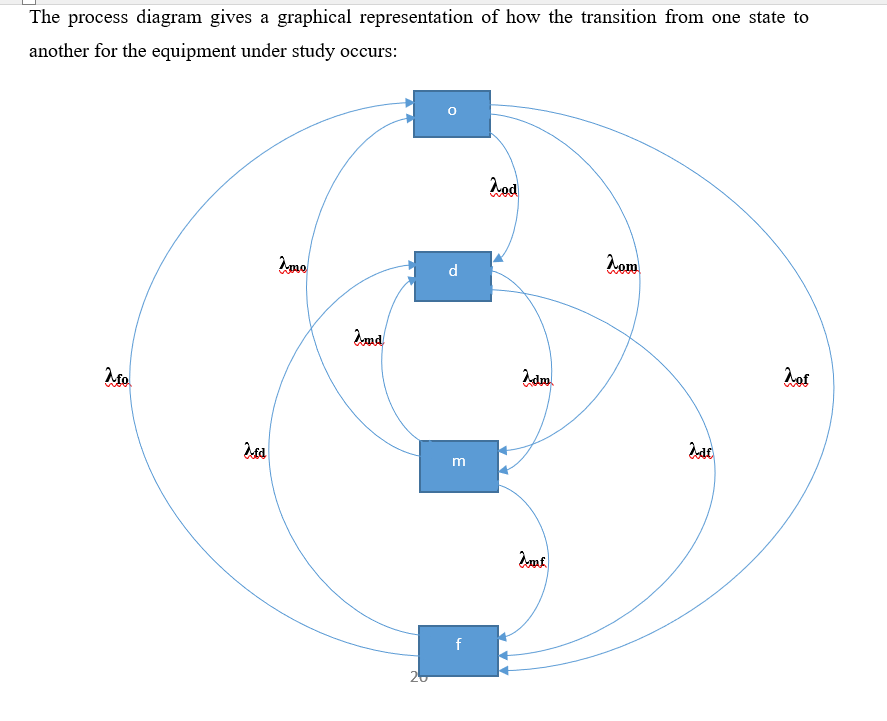


An MDP consists of a set of states, a set of actions, a transition function, and a reward function. The
(i) states represent the possible configurations of the environment i.e. metric to describe a given envionment
(ii) actions represent the choices that the agent can make (do nothing, maintain equipment, buy new one etc)
(iii) transition function describes the probabilities of transitioning between states based on the actions taken by the agent, and 
(iv) reward function defines the reward or punishment received by the agent for taking a particular action in a particular state.  The goal of the MDP model is to increase equipment availability, reduced maintenance downtime and reduced cost of carrying out maintenance as well overall operating cost by helping the maintenance personnel to properly plan and carry out maintenance actions.

However, the RL algorithm do not assume knowledge of an exact mathematical model of the Markov decision process and they target large Markov decision processes where exact methods become infeasible.[3]


Components of Reinforcement Learning 

Reinforcement Learning consists of the following components;  

(i) Agent: This is what to build and train
(ii)Envrionment: The real world situation with which the agent interacts or representation of  the conditions under which the agent operates.For example, the terrain to navigate, room condions etc. 
(iii)State space : A completion description of all the relevant aspects of the environment where the agent take actions.
(iv) Observation: This is similar to the state space, is a description of the relevant aspects of the environment at an instance or a particualr unit time. 
(v) Action space: All possible actions tha agent may take to change the observation from an environment.  
(vi) Reward : This is the positive (or negative) reinfrocement that  the agent receives from environment as a result of its action. It is a way to  evaluate the 'goodness' of an agent's action. 

In a nutshell, RL is the study of agents and how they learn by trial and error. It formalizes the idea that rewarding or punishing an agent for its behavior makes it more likely to repeat or forego that behavior in the future. The differeent landscape of RL algorithmsis available : https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html


This study focuses on two of the prominent RL algorithms widely employed to develop artificial intelligence (AI) games.

(1) Proximal Policy Optimization (PPO) is a reinforcement learning algorithm that aims to enhance the stability of training the policy by constraining the extent of policy adjustments made during each training epoch. The goal is to prevent excessively large updates to the policy.
There are two primary reasons for this approach:

(a) Too small, the training process was too slow
(b) Too high, there was too much variability in the training

In PPO, a conservative approach to policy updates is adopted. To achieve this, the extent of change in the current policy relative to the previous one is quantified by calculating a ratio between them. This ratio is then clipped within a specified range of [1−ϵ,1+ϵ], effectively discouraging the current policy from deviating too significantly from the previous one. This clipping mechanism embodies the proximal policy concept, ensuring a controlled and measured adjustment of the policy.


(2) The Advantage Actor Critic (A2C) algorithm combines  two distinct types of Reinforcement Learning paradigms, namely, Policy-Based and Value-Based algorithms. Policy-Based algorithms  directly acquire a policy, characterized as a probability distribution of actions, which maps input states to corresponding output actions. In contrast, Value-Based algorithms ascertain actions based on the predicted value associated with the input state or action. In the A2C integrated approach, the actor component receives the state as input and generates the optimal action, essentially dictating the agent's behavior by acquiring the optimal policy (policy-based) while the critic evaluates actions by computing the value function (value-based). The dynamic interplay between the actor and critic models within the gaming environment fosters improvement in their respective roles over time. Consequently, the A2C architecture attains enhanced efficiency in gameplay compared to the efficacy of the individual methods in isolation.

 These algorithms have been successfully applied across a spectrum of games such as soccer [4], and board games. Consequently, numerous well-established deep reinforcement learning libraries have incorporated A2C and PPO. While it is commonly accepted that A2C and PPO are distinct algorithms, as reflected in their architectural implementations within RL libraries, this understanding is primarily derived from the apparent differences in PPO's clipped objective and training paradigm when compared with A2C's objective. 

In this study, however, our exploration of these two algorithms is not conducted to provide theoretical evidence for their distinction; rather, it seeks to establish a foundational comprehension of RL principles.


##  Case 1: Training with  Proximal Policy Optimization algorithm 

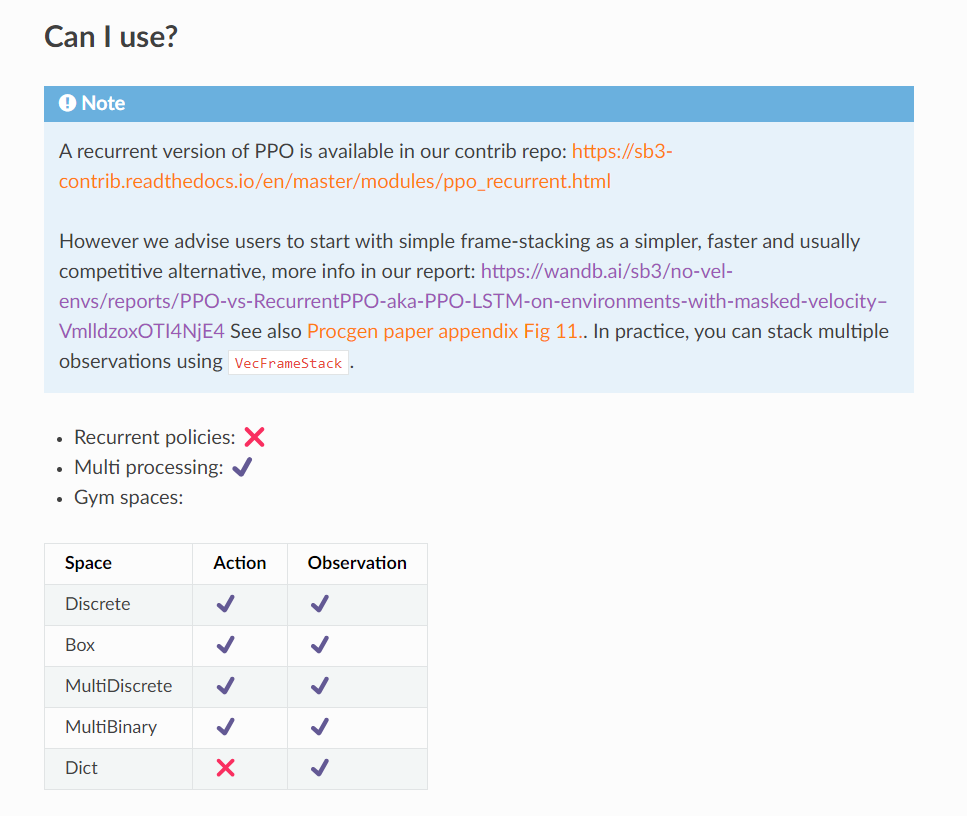

### (a) Train a reinforcement learning model (PPO):

In [6]:
import os
import torch
import gymnasium as gym
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.callbacks import EvalCallback
from torch.utils.tensorboard import SummaryWriter
from typing import Callable

# Define a function for the linear_scheduler
def linear_schedule(initial_value: float):
    def schedule(progress_remaining):
        return max(0.0, initial_value * progress_remaining)

    return schedule

# Create a Gym environment
env = gym.make('CartPole-v1', render_mode='human')

# Define the initial learning rate
initial_learning_rate = 0.01

# Create a learning rate schedule using the scheduler
learning_rate_schedule = linear_schedule(initial_learning_rate)

# Initialize TensorBoard writer
log_path = os.path.join('Training', 'Logs')
writer = SummaryWriter(log_dir=log_path)

# Initialize the PPO model with the custom learning rate schedule and TensorBoard logging
model_ppo = PPO("MlpPolicy", env, verbose=1, learning_rate=learning_rate_schedule, tensorboard_log=log_path)

# Train the PPO model with TensorBoard logging
total_timesteps_ppo = 10000
ppo_callback = EvalCallback(
    eval_freq=1000,
    best_model_save_path=os.path.join(log_path, 'best_model_ppo'),
    log_path=log_path,
    eval_env=env,
    n_eval_episodes=5,
    deterministic=True
)
model_ppo.learn(total_timesteps=total_timesteps_ppo, callback=ppo_callback, tb_log_name='ppo')


# Close the environment
env.close()


# Close TensorBoard writer
writer.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training/Logs/ppo_1


/Users/kundankumar/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000, episode_reward=9.80 +/- 0.98
Episode length: 9.80 +/- 0.98
---------------------------------
| eval/              |          |
|    mean_ep_length  | 9.8      |
|    mean_reward     | 9.8      |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=9.80 +/- 0.40
Episode length: 9.80 +/- 0.40
---------------------------------
| eval/              |          |
|    mean_ep_length  | 9.8      |
|    mean_reward     | 9.8      |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | 23       |
| time/              |          |
|    fps             | 42       |
|    iterations      | 1        |
|    time_elapsed    | 48       |
|    total_timesteps | 2048     |
----------------------------

### (b) Visualize the model in Tensorboard  :(PPO)

In [11]:
#%tensorboard --logdir Training/Logs/PPO_59
%tensorboard --logdir Training/Logs/ppo_1 # Take note of the Logging to Training\Logs\PPO_number

Reusing TensorBoard on port 6006 (pid 33409), started 1 day, 7:55:00 ago. (Use '!kill 33409' to kill it.)

In [12]:
#Check for Active TensorBoard Processes:
#!tasklist | find "tensorboard"

In [13]:
#Kill TensorBoard Processes:
#!taskkill /F /PID 31912

### (c) Reload the model (if necessary)   :(PPO)

In [14]:
PPO_path = os.path.join(log_path, 'best_model_ppo', 'best_model_ppo.zip')  # Corrected path

# Ensure the file exists before loading
if os.path.isfile(PPO_path):
    model = PPO.load(PPO_path, env=env)



### (d) Visualise the trained agent's behavior in the environment :(PPO)

In [15]:
# Re-evaluate : this is to visualise the agent 
from stable_baselines3.common.evaluation import evaluate_policy

env = gym.make('CartPole-v1', render_mode='human') 

# Evaluate the trained PPO model
mean_reward, std_reward = evaluate_policy(model_ppo, env, n_eval_episodes=10, render=True)

# Print the mean and standard deviation of the rewards during evaluation
print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")


Mean Reward: 332.7, Std Reward: 62.35070168009338


###  Case 2: Training with  Advantage Actor-Critic (A2C) algorithm 

Introduction to A2C



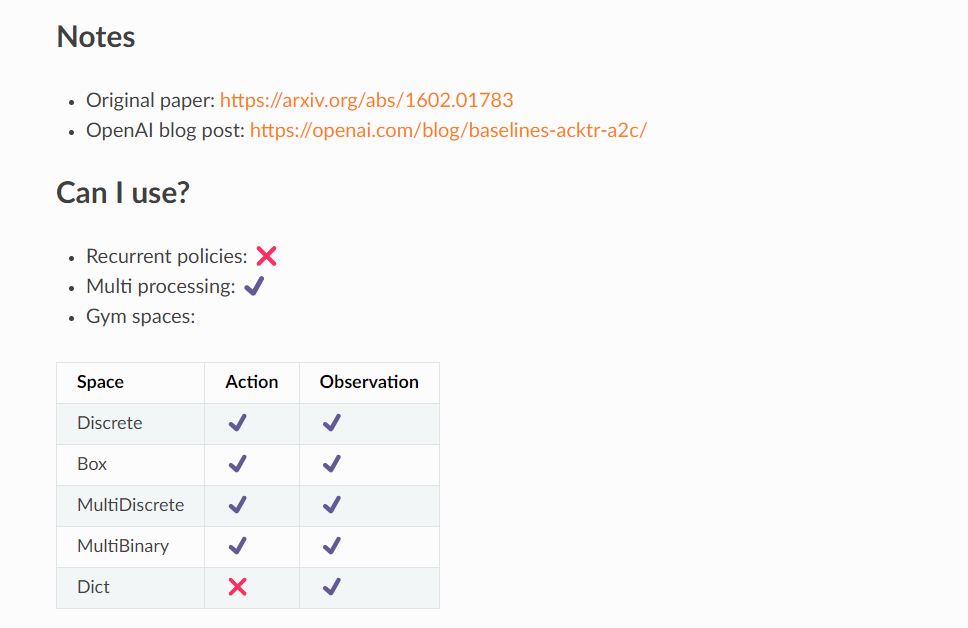

### (a) Train a reinforcement learning model (A2C):

In [16]:
import gym
import os
import torch
from stable_baselines3 import A2C
from stable_baselines3.common.callbacks import EvalCallback
from torch.utils.tensorboard import SummaryWriter
from typing import Callable

# Define a function for the linear_scheduler
def linear_schedule(initial_value: float):
    def schedule(progress_remaining):
        return max(0.0, initial_value * progress_remaining)

    return schedule

# Create a Gym environment
env = gym.make('CartPole-v1', render_mode='human')

# Define the initial learning rate
initial_learning_rate = 0.01

# Create a learning rate schedule using the scheduler
learning_rate_schedule = linear_schedule(initial_learning_rate)

# Initialize TensorBoard writer
log_path = os.path.join('Training', 'Logs')
writer = SummaryWriter(log_dir=log_path)

# Initialize the A2C model with the custom learning rate schedule and TensorBoard logging
model_a2c = A2C("MlpPolicy", env, verbose=1, learning_rate=learning_rate_schedule, tensorboard_log=log_path)

# Train the A2C model with TensorBoard logging
total_timesteps_a2c = 10000
a2c_callback = EvalCallback(
    eval_freq=1000,
    best_model_save_path=os.path.join(log_path, 'best_model_a2c'),
    log_path=log_path,
    eval_env=env,
    n_eval_episodes=5,
    deterministic=True
)
model_a2c.learn(total_timesteps=total_timesteps_a2c, callback=a2c_callback, tb_log_name='a2c')

# Close the environment
env.close()

# Close TensorBoard writer
writer.close()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training/Logs/a2c_1


/Users/kundankumar/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/kundankumar/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 9.32      |
|    ep_rew_mean        | 9.32      |
| time/                 |           |
|    fps                | 42        |
|    iterations         | 100       |
|    time_elapsed       | 11        |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -1.98e-05 |
|    explained_variance | 0.941     |
|    learning_rate      | 0.0095    |
|    n_updates          | 99        |
|    policy_loss        | 4.02e-07  |
|    value_loss         | 1.58      |
-------------------------------------
Eval num_timesteps=1000, episode_reward=9.40 +/- 0.49
Episode length: 9.40 +/- 0.49
-------------------------------------
| eval/                 |           |
|    mean_ep_length     | 9.4       |
|    mean_reward        | 9.4       |
| time/                 |           |
|    total_timesteps    | 1000      |
| train/                |           |
|   

KeyboardInterrupt: 

### (b) Visualize the model in Tensorboard :(A2C)

In [17]:
#!kill 34276

In [20]:
#!tensorboard --logdir Training/Logs/a2c_1 # Take note of the Logging to Training\Logs\PPO_number

In [21]:
#Kill TensorBoard Processes:
#!taskkill /F /PID 31912

### (c) Reload the model (if necessary) :(A2C)

In [22]:
log_path

'Training/Logs'

In [23]:
A2C_path = os.path.join(log_path, 'best_model_a2c', 'best_model_a2c.zip')  # Corrected path

# Ensure the file exists before loading
if os.path.isfile(A2C_path):
    model = a2c.load(A2C_path, env=env)


### (d) Visualise the trained agent's behavior in the environment :(A2C)

In [24]:
# Re-evaluate : this is to visualise the agent 
from stable_baselines3.common.evaluation import evaluate_policy

env = gym.make('CartPole-v1', render_mode='human') 

# Evaluate the trained A2C model
mean_reward, std_reward = evaluate_policy(model_a2c, env, n_eval_episodes=10, render=True)

# Print the mean and standard deviation of the rewards during evaluation
print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

env.close()

Mean Reward: 9.2, Std Reward: 0.4


### (a) Train a reinforcement learning model (DQN)

In [25]:
import os
import torch
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback
from torch.utils.tensorboard import SummaryWriter
from typing import Callable

# Define a function for the linear_scheduler
def linear_schedule(initial_value: float):
    def schedule(progress_remaining):
        return max(0.0, initial_value * progress_remaining)

    return schedule

# Create a Gym environment
env = gym.make('CartPole-v1', render_mode='human')

# Define the initial learning rate
initial_learning_rate = 0.01

# Create a learning rate schedule using the scheduler
learning_rate_schedule = linear_schedule(initial_learning_rate)

# Initialize TensorBoard writer
log_path = os.path.join('Training', 'Logs')
writer = SummaryWriter(log_dir=log_path)

# Initialize the DQN model with the custom learning rate schedule and TensorBoard logging
model_dqn = DQN("MlpPolicy", env, verbose=1, learning_rate=learning_rate_schedule, tensorboard_log=log_path)

# Train the DQN model with TensorBoard logging
total_timesteps_dqn = 10000
dqn_callback = EvalCallback(
    eval_freq=1000,
    best_model_save_path=os.path.join(log_path, 'best_model_dqn'),
    log_path=log_path,
    eval_env=env,
    n_eval_episodes=5,
    deterministic=True
)
model_dqn.learn(total_timesteps=total_timesteps_dqn, callback=dqn_callback, tb_log_name='dqn')

# Make predictions with the trained A2C model
obs = env.reset()
action_dqn, _ = model_dqn.predict(obs)


# Close the environment
env.close()


# Close TensorBoard writer
writer.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training/Logs/dqn_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 19       |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 40       |
|    time_elapsed     | 1        |
|    total_timesteps  | 76       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.835    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 43       |
|    time_elapsed     | 3        |
|    total_timesteps  | 174      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 84       |
|    fps              | 38       |
|    time_elapsed     | 47       |
|    total_timesteps  | 1836     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 88       |
|    fps              | 38       |
|    time_elapsed     | 49       |
|    total_timesteps  | 1902     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 164      |
|    fps              | 36       |
|    time_elapsed     | 101      |
|    total_timesteps  | 3663     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 168      |
|    fps              | 36       |
|    time_elapsed     | 103      |
|    total_timesteps  | 3779     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 35       |
|    time_elapsed     | 150      |
|    total_timesteps  | 5368     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 35       |
|    time_elapsed     | 152      |
|    total_timesteps  | 5479     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 35       |
|    time_elapsed     | 202      |
|    total_timesteps  | 7260     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 35       |
|    time_elapsed     | 204      |
|    total_timesteps  | 7326     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

Eval num_timesteps=9000, episode_reward=42.60 +/- 5.95
Episode length: 42.60 +/- 5.95
----------------------------------
| eval/               |          |
|    mean_ep_length   | 42.6     |
|    mean_reward      | 42.6     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 9000     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 408      |
|    fps              | 35       |
|    time_elapsed     | 253      |
|    total_timesteps  | 9077     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|   

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

### (b) Visualize the model in Tensorboard :(DQN)

In [26]:
log_path

'Training/Logs'

In [27]:
#!tensorboard --logdir Training/Logs/dqn_1 # Take note of the Logging to Training_DQN/Logs_DQN/best_model_dqn

### (c) Reload the model (if necessary) :(DQN)

In [28]:
dqn_path = os.path.join(log_path, 'best_model_dqn', 'best_model_dqn.zip')  # Corrected path

# Ensure the file exists before loading
if os.path.isfile(dqn_path):
    model = dqn.load(dqn_path, env=env)


### (d) Visualise the trained agent's behavior in the environment :(DQN)

In [29]:
# Re-evaluate : this is to visualise the agent 
from stable_baselines3.common.evaluation import evaluate_policy

env = gym.make('CartPole-v1', render_mode='human') 

# Evaluate the trained PPO model
mean_reward, std_reward = evaluate_policy(model_dqn, env, n_eval_episodes=10, render=True)

# Print the mean and standard deviation of the rewards during evaluation
print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")


Mean Reward: 74.0, Std Reward: 21.854061407436376


# plot the learning curve

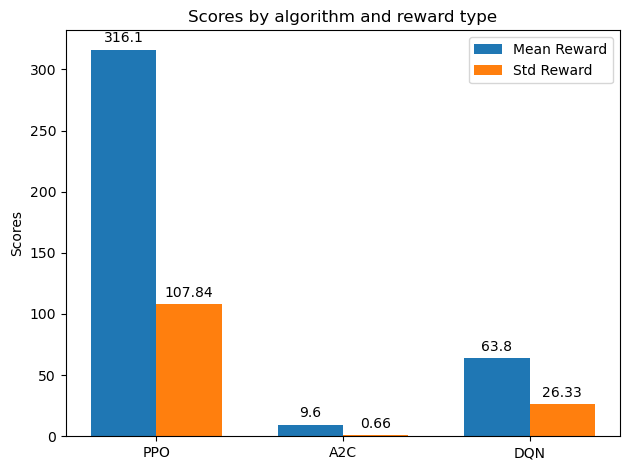

In [30]:
import matplotlib.pyplot as plt
import numpy as np

from stable_baselines3.common.evaluation import evaluate_policy

# Evaluate the trained PPO model
mean_reward_PPO, std_reward_PPO = evaluate_policy(model_ppo, env, n_eval_episodes=10, render=True)

# Evaluate the trained A2C model
mean_reward_a2c, std_reward_a2c = evaluate_policy(model_a2c, env, n_eval_episodes=10, render=True)

# Evaluate the trained DQN model
mean_reward_dqn, std_reward_dqn = evaluate_policy(model_dqn, env, n_eval_episodes=10, render=True)

algorithms = ['PPO', 'A2C', 'DQN']
mean_rewards = [mean_reward_PPO, mean_reward_a2c, mean_reward_dqn]
std_rewards = [std_reward_PPO, std_reward_a2c, std_reward_dqn]

x = np.arange(len(algorithms))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_rewards, width, label='Mean Reward')
rects2 = ax.bar(x + width/2, std_rewards, width, label='Std Reward')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by algorithm and reward type')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Attach a text label above each bar in rects1 and rects2, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
